In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg


compute phi(x) for x in [0, L] with d^2 phi / dx^2 = f(x) f(x) given and with boundary conditions

 phi(0) = a
 phi(L) = b

 using finite differences

 1/ Start from a solution phi(x) and compute a, b and the discrete f_i

 2/ Use f_i, a and b to retrieve the discrete phi_i
"""

In [2]:
#1st question)

plt.ion()
plt.close("all")

# set up a spatial discretization
L = 2.*np.pi
nx = 50

# define the x locations
dx = L/nx
#dx est le pas
xe = np.arange(nx+1)*dx

# set up an analytical function
def phi_analytical(x):
    return np.sin(x)


# discrete phi
phi = phi_analytical(xe)


#xe are the coordinate of the edges
f1 = plt.figure()
plt.plot(xe, phi)


# boundary values
a = phi_analytical(0)
b = phi_analytical(L)

print("boundary conditions")
print(f"  - phi(0) = {a}")
print(f"  - phi(L) = {b}")

boundary conditions
  - phi(0) = 0.0
  - phi(L) = -2.4492935982947064e-16


# TODO compute the discrete f_i, plot it, compare it to the analytical
# solution and compute the Linfinity norm

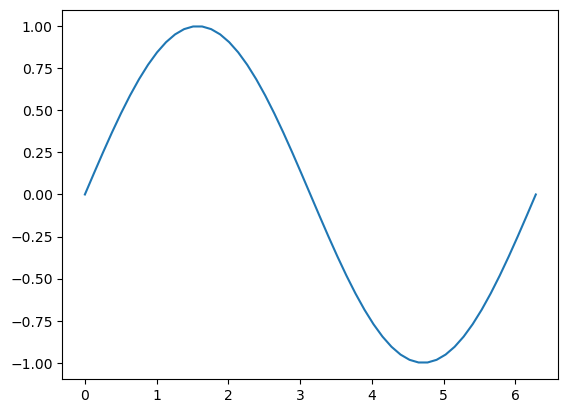

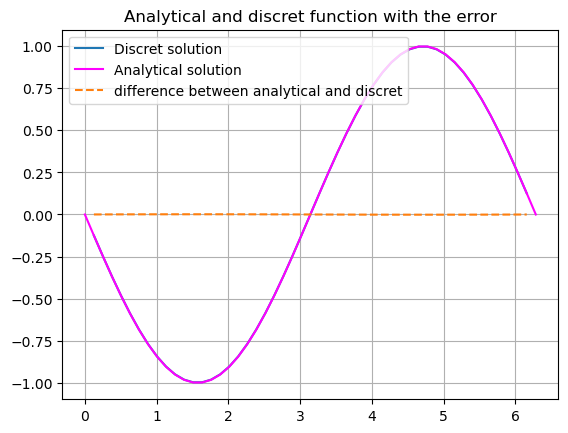

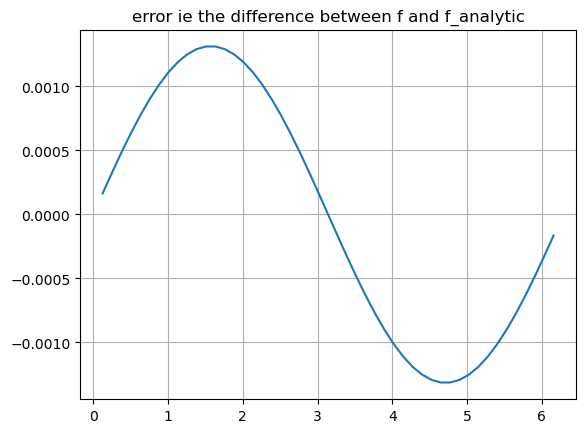

In [3]:
#we initialize f as a vector of zeros, nx+1 is the number of edges
f = np.zeros((nx+1,))

#we delete the extreme edges = 0 and L because we can't compute the derivation 
#at these points 
f[0] = np.nan
f[-1] = np.nan

#we compute the discret function f
for i in range(1,nx):
    #we compute at the 2nd order to be more precise. 
    #The more we increase the derivation order, the more we have an exact estimation 
    #of the discret f.
    f[i] = (phi[i+1] + phi[i-1] - 2*phi[i]) / dx**2

#we define the analytical function
def analytic_function(x):
    return -np.sin(x)


#figure that compares the 2 solutions : analytical and discret

error = f - analytic_function(xe)
#error is an array

#for f = -sin(x)
f3 = plt.figure()
plt.title('Analytical and discret function with the error')
plt.plot(xe,f, label = 'Discret solution')
plt.plot(xe,analytic_function(xe),'magenta', label = 'Analytical solution')
plt.plot(xe, error,'--', label='difference between analytical and discret')
plt.legend()
plt.grid()

f4 = plt.figure()
plt.title('error ie the difference between f and f_analytic')
plt.plot(xe,error)
plt.grid()
plt.show()

# 2nd question)
# TODO: convergence study: plot the Linf error as a function of nx in
# a log-log plot. Show that the discretization is second order
# Hint: compute the error for these resolutions
#
# >>> nxs = 10*(2**np.arange(10))

In [4]:
#we define the resolution
nxs = 10*(2**np.arange(10))

def function_norm_error(nxs):
    """ for each dx, nx,... we have to calculate the error term between our two functions"""
    eps = np.zeros((nxs.size,))
    #we use here enumerate, that takes the indices and a value used in the loop
    for k,nx in enumerate (nxs):
        dx = L/nx
        xe = np.arange(nx+1)*dx
        phi = phi_analytical(xe)
        f = np.zeros((nx+1,))
        
        for i in range(1,nx):
            f[i] = (phi[i+1]+phi[i-1]-2*phi[i])/dx**2
            f[0] = np.nan
            f[-1] = np.nan
            
        error = f - analytic_function(xe)
        eps[i] = np.linalg.norm(error[1:-1], ord=np.inf)
        
    return(eps)


norm = function_norm_error(nxs)
print(norm)
print(error)
#In order to observe the Linf error as a function of nx
f3 = plt.figure()
plt.title('Log of the norm error')
plt.loglog(nxs,norm)
plt.ylim(1*10**(-3),2*10**(-3))
plt.show()
print(norm)  


# evaluate the slope

p = np.polyfit(np.log(nxs), np.log(norm), 1)

print(p)
#we can deduce that the eps is proportionnal to nx**(-alpha) or to h**alpha, here alpha is the 


IndexError: index 19 is out of bounds for axis 0 with size 10

# 3rd question
# TODO: rewrite the laplacian in vectorized form = without loop

In [80]:
from scipy.sparse import linalg


### entre les points d'indices i-1 et i+1 on a un écart de 2*dx, donc on décale la liste de 2 termes
#le point d'indice i se situe au milieu(écart de dx avec les autres termes), donc on décale de 1 seulement.
f =  (phi[2:] + phi[:-2] - 2*phi[1:-1]) /dx**2
print(f.shape)
# TODO: compute the laplacian with a matrix * vector operation hint:
# define the Laplacian matrix, if A is the matrix, A.dot(phi) does the
# matrix * vector multiplication

#This is a way to create the matrix M but it is not the most rapidly. 


#I define the matrix M full of zeros
nx=48
M = np.zeros((nx+1,nx+1))
#indexes of my matrix
m = np.arange(0,nx+1)
#bondary conditions
a = phi_analytical(0)
b = phi_analytical(L)
#print(a,b)

#in order to have my whole problem (differential equation and boundaries),
#I add the boundaries a,b resp. at the first and last lines of M

M[[m],[m]] = -2/(dx**2)
#terms below and upon the diagonal
M[ [m[1:nx+1]] , [m[0:nx]] ] = 1/(dx**2)
M[ [m[0:nx]] , [m[1:nx+1]] ] = 1/(dx**2)
#print(M)

#I have to reduce my matrix because of calculus for my first and last line that are wrong. Futhermore, I have to consider my initial conditions 
#M_truncated:
"""
M[ [m[0]] ,[m[1:nx+1]] ] = np.nan
M[ [m[-1]] , [m[1:nx+1]] ] = np.nan
M[ [m[1:nx+1]] , [m[0]] ] = np.nan
M[ [m[1:nx+1]] , [m[-1]] ] = np.nan
"""

"""
#I plot the function f
f = M.dot(phi)
f[0] = np.nan
f[-1] = np.nan
print(f)
f4 = plt.figure()
plt.plot(xe,f, 'orange',label = 'Laplacian computed with a matrix*vector')
plt.legend()
"""

(49,)


"\n#I plot the function f\nf = M.dot(phi)\nf[0] = np.nan\nf[-1] = np.nan\nprint(f)\nf4 = plt.figure()\nplt.plot(xe,f, 'orange',label = 'Laplacian computed with a matrix*vector')\nplt.legend()\n"

# 4th question)
# TODO retrieve the discretized phi using f and (a, b) by solving
# the system of equation. Use np.linalg.solve

In [87]:
from scipy.sparse import linalg
from scipy import sparse
nx=48
M_truncated = M[1:-1, 1:-1]

f_truncated = f[1:-1].copy()
print(f_truncated.shape)
print(M_truncated.shape)
phi_truncated = np.linalg.solve(M_truncated, f_truncated)

phi_solution = np.zeros((nx+1,))
print(phi_solution.shape)
phi_solution[0] = a
phi_solution[-1] = b
phi_solution[1:-1] = phi_truncated

print(phi_truncated.shape)


print(M)

(47,)
(47, 47)
(49,)
(47,)
[[-126.65147955   63.32573978    0.         ...    0.
     0.            0.        ]
 [  63.32573978 -126.65147955   63.32573978 ...    0.
     0.            0.        ]
 [   0.           63.32573978 -126.65147955 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -126.65147955
    63.32573978    0.        ]
 [   0.            0.            0.         ...   63.32573978
  -126.65147955   63.32573978]
 [   0.            0.            0.         ...    0.
    63.32573978 -126.65147955]]


# TODO redo the computation with a sparse matrix instead of full matrix

2.9912523573350967e+86
(49,)
(49,)
(49,)


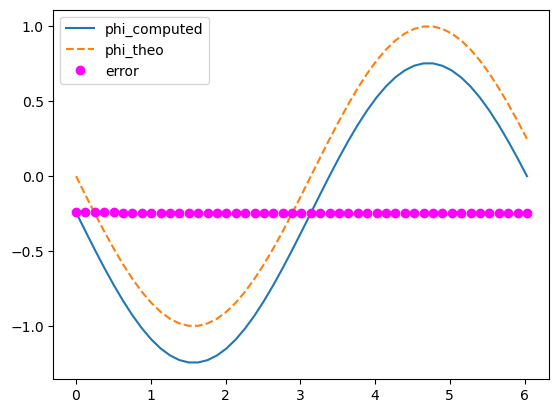

In [89]:
#on corrige à la main les coins
M[0,0] = -1/dx**2
M[-1,-1] = -1/dx**2

#on ne peut pas résoudre l'équation ainsi. En effet, la dernière ligne nx s'obtient en sommant toutes les lignes au dessus
#La solution est définie à une constante près
#Il suffit donc de fixer phi en 1 point à la ligne nx
M_reducted = M[:nx, :nx]
print(np.linalg.det(M_reducted))
#print(M)
def f(x):
    return(np.sin(x))

def phi_theo(x):
    return(-np.sin(x))
#right hand side of the equation
A_bc = -1
rhs = f(xe[:nx])
rhs[0] /=2
rhs[0] += A_bc/dx
phi_computed = np.zeros((nx+1),)
phi_computed[:-1] = np.linalg.solve(M_reducted, rhs)

print(phi_computed.shape)
print(xe[:nx+1].shape)
print(phi_theo(xe[:nx+1]).shape)
plt.plot(xe[:nx+1], phi_computed, label= 'phi_computed')
plt.plot(xe[:nx+1], phi_theo(xe[:nx+1]), '--', label='phi_theo')
plt.plot(xe[:nx+1],phi_computed - phi_theo(xe[:nx+1]),'o', label = 'error', color = 'magenta')
plt.legend()
plt.show()

# TODO compute the discrete phi from the discrete f using Neumann
# boundary conditions (the value of the derivative is imposed at
# endpoints) hint: copy-paste the Dirichlet BC case and adapt it to
# the Neumann BC case

In [100]:
Ms = sparse.coo_matrix(M_reducted)
print(Ms)

I = []
J=[]
coef = []
for row in range(nx):
    for col in range(nx):
        if row==col:
            if row == 0:
                I.append(row)
                J.append(col)
                coef.append(-1/dx**2)

            else :
                I.append(row)
                J.append(col)
                coef.append(-2/dx**2)
        
        elif row == col-1:
            I.append(row)
            J.append(col)
            coef.append(1/dx**2)

        elif row == col+1:
            I.append(row)
            J.append(col)
            coef.append(1/dx**2)
        
N = len(I)
for k in range(N):
    print(I[k], J[k], coef[k])
    
myMs = sparse.coo_matrix((coef, (I,J)), shape=(nx,nx))
          

  (0, 0)	-63.325739776461106
  (0, 1)	63.325739776461106
  (1, 0)	63.325739776461106
  (1, 1)	-126.65147955292221
  (1, 2)	63.325739776461106
  (2, 1)	63.325739776461106
  (2, 2)	-126.65147955292221
  (2, 3)	63.325739776461106
  (3, 2)	63.325739776461106
  (3, 3)	-126.65147955292221
  (3, 4)	63.325739776461106
  (4, 3)	63.325739776461106
  (4, 4)	-126.65147955292221
  (4, 5)	63.325739776461106
  (5, 4)	63.325739776461106
  (5, 5)	-126.65147955292221
  (5, 6)	63.325739776461106
  (6, 5)	63.325739776461106
  (6, 6)	-126.65147955292221
  (6, 7)	63.325739776461106
  (7, 6)	63.325739776461106
  (7, 7)	-126.65147955292221
  (7, 8)	63.325739776461106
  (8, 7)	63.325739776461106
  (8, 8)	-126.65147955292221
  :	:
  (39, 39)	-126.65147955292221
  (39, 40)	63.325739776461106
  (40, 39)	63.325739776461106
  (40, 40)	-126.65147955292221
  (40, 41)	63.325739776461106
  (41, 40)	63.325739776461106
  (41, 41)	-126.65147955292221
  (41, 42)	63.325739776461106
  (42, 41)	63.325739776461106
  (42, 42)	-

# TODO adapt the Dirichlet case in the case of a non-uniform
# discretization Instead of using # >>> xe = np.arange(nx+1)*dx use xe = g( np.arange(nx+1)/(nx+1) )

In [99]:


# with

# def g(x):    
#     return L*x**2
#sparse.coo_matrix?
#https://en.wikipedia.org/wiki/Sparse

Init signature: sparse.coo_matrix(arg1, shape=None, dtype=None, copy=False)
Docstring:     
A sparse matrix in COOrdinate format.

Also known as the 'ijv' or 'triplet' format.

This can be instantiated in several ways:
    coo_matrix(D)
        with a dense matrix D

    coo_matrix(S)
        with another sparse matrix S (equivalent to S.tocoo())

    coo_matrix((M, N), [dtype])
        to construct an empty matrix with shape (M, N)
        dtype is optional, defaulting to dtype='d'.

    coo_matrix((data, (i, j)), [shape=(M, N)])
        to construct from three arrays:
            1. data[:]   the entries of the matrix, in any order
            2. i[:]      the row indices of the matrix entries
            3. j[:]      the column indices of the matrix entries

        Where ``A[i[k], j[k]] = data[k]``.  When shape is not
        specified, it is inferred from the index arrays

Attributes
----------
dtype : dtype
    Data type of the matrix
shape : 2-tuple
    Shape of the matrix
ndim 